# PROJECT - SEQUENTIAL NLP

## PART-1

- **DOMAIN:** Digital content and entertainment industry<br>
<br>
- **CONTEXT:** The objective of this project is to build a text classification model that analyses the customer's sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build an embedding layer followed by a classification algorithm to analyse the sentiment of the customers.<br>
<br>
- **DATA DESCRIPTION:** The Dataset of 50,000 movie reviews from IMDB, labelled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word. Use the first 20 words from each review to speed up training, using a max vocabulary size of 10,000. As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.<br>
<br>
- **PROJECT OBJECTIVE:** Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments.
<br>
Steps and tasks:
<br>
1. Import and analyse the data set.<br>
Hint: - Use `imdb.load_data()` method
- Get train and test set
- Take 10000 most frequent words
<br>
2. Perform relevant sequence adding on the data<br>
<br>
3. Perform following data analysis:<br>
• Print shape of features and labels<br>
• Print value of any one feature and it's label<br>
<br>
4. Decode the feature value to get original sentence<br>
<br>
5. Design, train, tune and test a sequential model.<br>
<br>
Hint: The aim here Is to import the text, process it such a way that it can be taken as an inout to the ML/NN
classifiers. Be analytical and experimental here in trying new approaches to design the best model.
<br><br>
6. Use the designed model to print the prediction on any one sample.

### 1. Import and analyse the data set.

In [1]:
## import the libraries and dataset
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPool1D, LSTM, TimeDistributed, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb


#### - Get the train and test set
#### - Take 10000 most frequent words

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000, maxlen=300)

##### Know the shape of the train and test dataset

In [3]:
print(X_train.shape)
print(y_train.shape)
print(y_train)
print(y_test)

(19051,)
(19051,)
[1 0 0 ... 0 1 0]
[0 1 0 ... 0 0 0]


In [4]:
# summarize the number of labels
print("Labels : ")
print(np.unique(y_train))

Labels : 
[0 1]


In [5]:
X_train_max_len = max(len(x) for x in X_train)
print(f"Max length of sequence in X_train: {X_train_max_len}")

X_test_max_len = max(len(x) for x in X_test)
print(f"Max length of sequence in X_test: {X_test_max_len}")

Max length of sequence in X_train: 299
Max length of sequence in X_test: 299


#### 2. Perform relevant sequence adding on the data

#### Padding each sentence to be of same length

Review length: 
Mean 159.68 words (60.730229)


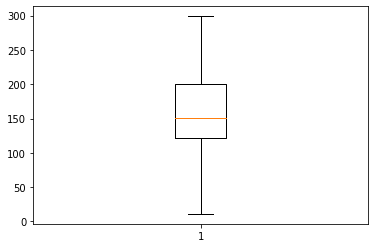

In [6]:
#summarize review length
print("Review length: ")
result = [len(x) for x in X_train]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
#plot review length
plt.boxplot(result)
plt.show()

In [7]:
#padding to 300 length
X_train_padded = sequence.pad_sequences(X_train, maxlen=300)
X_test_padded = sequence.pad_sequences(X_test, maxlen=300)

#### 3. Perform following data analysis:
- Print shape of features and labels

In [8]:
# Number of reviews, number of words in each review
# Number of reviews
print(f"Number of reviews in X_train: {len(X_train)}")
print(f"Number of reviews in X_test: {len(X_test)}")

# number of words in each review
print(f"Number of words in each review is {X_train_padded[0].shape[0]}")

Number of reviews in X_train: 19051
Number of reviews in X_test: 19450
Number of words in each review is 300


In [9]:
#Number of labels
print(y_train.shape)
print(y_test.shape)

(19051,)
(19450,)


In [10]:
#print unique lables 
print(f"Unique labels: {np.unique(y_train)}")

Unique labels: [0 1]


- Print value of any one feature and it's label

In [11]:
#Feature value
print(f"Value of the 100th review: {X_train[100]}")

Value of the 100th review: [1, 14, 9, 6, 389, 20, 19, 6, 253, 1096, 65, 5, 4, 6891, 7, 1181, 3855, 5, 4, 620, 756, 7, 803, 674, 11, 113, 97, 14, 6, 55, 467, 2525, 20, 92, 387, 4, 2, 7, 4, 182, 2, 25, 39, 319, 14, 2065, 47, 389, 388, 5, 13, 594, 33, 4, 192, 15, 212, 9, 115, 2525, 88, 156, 40, 2065, 97, 170, 39, 486, 8, 622, 1801, 168, 6529, 776, 87, 20, 32, 187]


In [12]:
#Label value
print(f"Sentiment Label : {y_train[100]}")

Sentiment Label : 1


#### Decode the feature value to get original sentence

Retrieve a dictionary that contains mapping of words to their index in the IMDB dataset.

In [13]:
imdb_word_index = imdb.get_word_index()

Now use the dictionary to get the original words from the encodings for a particular sentence


In [14]:
index_from = 3
imdb_word_index = {key:value + index_from for (key,value) in imdb_word_index.items()}
imdb_word_index['the']

4

In [24]:
reverse_word_index = {value:key for key,value in imdb_word_index.items()}
[reverse_word_index[n] for n in X_train[100] if n > index_from]

['this',
 'is',
 'a',
 'wonderful',
 'movie',
 'with',
 'a',
 'fun',
 'clever',
 'story',
 'and',
 'the',
 'dynamics',
 'of',
 'culture',
 'differences',
 'and',
 'the',
 'running',
 'theme',
 'of',
 "what's",
 'important',
 'in',
 'life',
 'make',
 'this',
 'a',
 'very',
 'under',
 'appreciated',
 'movie',
 "don't",
 'let',
 'the',
 'of',
 'the',
 'world',
 'you',
 'from',
 'seeing',
 'this',
 'keaton',
 'has',
 'wonderful',
 'moments',
 'and',
 'i',
 'wonder',
 'at',
 'the',
 'fact',
 'that',
 'comedy',
 'is',
 'never',
 'appreciated',
 'because',
 'actors',
 'like',
 'keaton',
 'make',
 'going',
 'from',
 'humor',
 'to',
 'serious',
 'bits',
 'look',
 'tremendously',
 'easy',
 'great',
 'movie',
 'all',
 'around']

Get the sentiment for the above sentence
- postive(1)
- negative (0)

In [16]:
y_train[100]


1

#### 5. Design, train, tune and test a sequential model

##### Define model
- Defining a sequential model


In [17]:
vocabulary = 10000
max_words = 300

model = Sequential()
model.add(Embedding(vocabulary, 100, input_length = max_words))
model.add(LSTM(100, return_sequences = True))
dense_layer = Dense(100, activation='relu')
model.add(TimeDistributed(dense_layer))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

##### Compile the model

In [18]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics='accuracy')

##### Print model summary

In [19]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 300, 100)          80400     
                                                                 
 time_distributed (TimeDistr  (None, 300, 100)         10100     
 ibuted)                                                         
                                                                 
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 30001     
                                                                 
Total params: 1,120,501
Trainable params: 1,120,501
Non-trainable params: 0
______________________________________________

##### Fit the model

In [20]:
model.fit(X_train_padded, y_train, epochs=5, batch_size=64)

Epoch 1/5
298/298 [==============================] - 262s 866ms/step - loss: 0.3750 - accuracy: 0.8214
Epoch 2/5
298/298 [==============================] - 268s 900ms/step - loss: 0.1788 - accuracy: 0.9319
Epoch 3/5
298/298 [==============================] - 271s 910ms/step - loss: 0.1060 - accuracy: 0.9617
Epoch 4/5
298/298 [==============================] - 269s 903ms/step - loss: 0.0602 - accuracy: 0.9783
Epoch 5/5
298/298 [==============================] - 274s 919ms/step - loss: 0.0393 - accuracy: 0.9867


##### Evaluating the model

In [21]:
scores,accuracy = model.evaluate(X_test_padded, y_test, verbose=0)
print("Score: {:.4f}".format(scores))
print("Accuracy : {:.4f}".format(accuracy))

Score: 0.6400
Accuracy : 0.8645


##### 6. Use the designed model to print the prediction on any one sample

In [34]:
## predicting using a simple review

good_review = "i liked the movie"
bad_review = "i did not like this movie"

In [35]:
imdb_word_index['i']

13

In [36]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
for review in [good_review, bad_review]:
    encoded_review = []
    review_split = review.split(" ")
    for word in review_split:
        encoded_review.append(imdb_word_index[word])
    review_padded = pad_sequences([encoded_review], maxlen=300)
    pred = model.predict(review_padded)
    if pred > 0.5:
        sentiment = 'positive'
    else:
        sentiment = 'negative'
    print("Review: {0}\n\tSentiment: {1}".format(review,sentiment))

Review: i liked the movie
	Sentiment: positive
Review: i did not like this movie
	Sentiment: negative


## PART-2

- **DOMAIN:** Social media analytics<BR>
    <br>
- **CONTEXT:** Past studies in Sarcasm Detection mostly make use of Twitter datasets collected
using hashtag based supervision but such datasets are noisy in terms of labels and
language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in
these requires the availability of contextual tweets.In this hands-on project, the goal is to
build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.<BR>
    <br>
- **DATA DESCRIPTION:** The dataset is collected from two news websites, theonion.com and huffingtonpost.com. 
    This new dataset has the following advantages over the existing Twitter datasets:
Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This reduces the sparsity and also increases the chance of finding pre-trained embeddings. Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as compared to Twitter datasets. Unlike tweets that reply to other tweets, the news headlines obtained are self-contained. This would help us in
teasing apart the real sarcastic elements
Content: Each record consists of three attributes:
is_sarcastic: 1 if the record is sarcastic otherwise 0
headline: the headline of the news article
article_link: link to the original news article. Useful in collecting supplementary data
Reference: https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection<BR>
    <br>
- **PROJECT OBJECTIVE:** Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments.<BR>
    <br>
Steps and tasks: <BR>
    <br>
1. Read and explore the data
2. Retain relevant columns
3. Get length of each sentence
4. Define parameters
5. Get indices for words
6. Create features and labels
7. Get vocabulary size
8. Create a weight matrix using GloVe embeddings
9. Define and compile a Bidirectional LSTM model.
Hint: Be analytical and experimental here in trying new approaches to design the best model.
10. Fit the model and check the validation accuracy

## Sarcasm Detection

#### 1. Read and explore the data

In [2]:
import pandas as pd

data = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)

In [4]:
# know the data
data

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [7]:
# to check the shape of the data
print(data.shape)

(26709, 3)


In [10]:
# the data contains 3 columns
data.columns

Index(['article_link', 'headline', 'is_sarcastic'], dtype='object')

In [12]:
data['headline'][1]

"the 'roseanne' revival catches up to our thorny political mood, for better and worse"

#### 2. Retain relevant columns

##### Dropping article_link from dataset, since it is not significant

As we need only headline text data and is_sarcastic column for the current project. We are dropping article_link column here

In [15]:
data.drop('article_link', inplace=True, axis=1)

#### 3. Get the length of each sentence

As different lines are of different length. We need to pad our sequences using the max length

In [16]:
maxlen = max([len(text) for text in data['headline']])

#####  Import required modules for modelling

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

#### 4. Define Parameters

In [19]:
max_features = 10000
maxlen = max([len(text) for text in data['headline']])
embedding_size = 200

#### 5.Get indices for words

## Apply Keras Tokenizer of headline column of your data.
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [ ]:
tokenizer = Tokenizer(num_words=max_features,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
tokenizer.fit_on_texts(data['headline'])

In [26]:
# there is no word for 0th index
tokenizer.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'from': 14,
 'at': 15,
 'about': 16,
 'you': 17,
 'this': 18,
 'by': 19,
 'after': 20,
 'up': 21,
 'out': 22,
 'be': 23,
 'how': 24,
 'as': 25,
 'it': 26,
 'that': 27,
 'not': 28,
 'are': 29,
 'your': 30,
 'his': 31,
 'what': 32,
 'he': 33,
 'all': 34,
 'just': 35,
 'who': 36,
 'has': 37,
 'will': 38,
 'more': 39,
 'one': 40,
 'into': 41,
 'report': 42,
 'year': 43,
 'why': 44,
 'have': 45,
 'area': 46,
 'over': 47,
 'donald': 48,
 'u': 49,
 'day': 50,
 'says': 51,
 's': 52,
 'can': 53,
 'first': 54,
 'woman': 55,
 'time': 56,
 'like': 57,
 'her': 58,
 "trump's": 59,
 'old': 60,
 'no': 61,
 'get': 62,
 'off': 63,
 'an': 64,
 'life': 65,
 'people': 66,
 'obama': 67,
 'now': 68,
 'house': 69,
 'still': 70,
 "'": 71,
 'women': 72,
 'make': 73,
 'was': 74,
 'than': 75,
 'white': 76,
 'back': 77,
 'my': 78,
 'i': 79,
 'clinton': 80,
 'down': 81,
 'i

#### 6. Create features and labels

#### Define X and y for the model

In [27]:
X = tokenizer.texts_to_sequences(data['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(data['is_sarcastic'])

print("Number of Samples : ", len(X))
print(X[0])
print("Number of Labels : ", len(y))
print(y[0])

Number of Samples :  26709
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0

#### 7. Get Vocabulory size

In [29]:
# since the 0th index doesn't have a word, add 1 to the length of the vocabulory
num_words = len(tokenizer.word_index) + 1
print(num_words)

29657


#### 8. Create a weight matrix using GloVe embeddings

In [31]:
# Get Glove word embeddings
glove_file = 'glove.6B.zip'

In [32]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
    z.extractall()

##### Get the Word Embeddings using Embedding file as given below.##### Get the Word Embeddings using Embedding file as given below.

In [38]:
EMBEDDING_FILE = 'glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE, encoding='utf8'):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

#### 9. Define and compile a Bidirectional LSTM model. Hint: Be analytical and experimental here in trying new approaches to design the best model.

Used Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, flatten it, then dense and dropout layers as required. -In the end added a final dense layer with sigmoid activation for binary classification.

In [40]:
input_layer = Input(shape=(maxlen,),dtype=tf.int64)
embed = Embedding(embedding_matrix.shape[0],output_dim=200,weights=[embedding_matrix],input_length=maxlen, trainable=True)(input_layer)
lstm=Bidirectional(LSTM(128))(embed)
drop=Dropout(0.3)(lstm)
dense =Dense(100,activation='relu')(drop)
out=Dense(2,activation='softmax')(dense)

#### 10. Fit the model and check the validation accuracy

fit the model with a batch size of 100 and validation_split = 0.2

In [42]:
batch_size = 100
epochs = 5

model = Model(input_layer,out)
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 254)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 254, 200)          5931400   
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              336896    
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               25700     
                                                                 
 dense_2 (Dense)             (None, 2)                 202       
                                                           

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/5
214/214 [==============================] - 718s 3s/step - loss: 0.4360 - accuracy: 0.7893
Epoch 2/5
214/214 [==============================] - 749s 4s/step - loss: 0.2542 - accuracy: 0.8936
Epoch 3/5
214/214 [==============================] - 751s 4s/step - loss: 0.1651 - accuracy: 0.9360
Epoch 4/5
214/214 [==============================] - 755s 4s/step - loss: 0.1083 - accuracy: 0.9605
Epoch 5/5
214/214 [==============================] - 762s 4s/step - loss: 0.0653 - accuracy: 0.9771


In [44]:
test_pred = model.predict(np.array(X_test), verbose=1)

167/167 [==============================] - 14s 80ms/step


In [45]:
test_pred = [1 if j>i else 0 for i,j in test_pred]

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_pred)

array([[2591,  440],
       [ 288, 2023]], dtype=int64)

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      3031
           1       0.82      0.88      0.85      2311

    accuracy                           0.86      5342
   macro avg       0.86      0.87      0.86      5342
weighted avg       0.87      0.86      0.86      5342

